In [32]:
import pandas as pd

In [33]:
data = df

In [34]:
df = pd.read_csv(r"C:\Users\Acer\Desktop\Data Sci Assignments\Logistic Regression\Titanic_train.csv")

In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
# Get summary statistics
summary_statistics = df.describe(include='all')

# Get data types of the features
data_types = df.dtypes

summary_statistics, data_types


(        PassengerId    Survived      Pclass                     Name   Sex  \
 count    891.000000  891.000000  891.000000                      891   891   
 unique          NaN         NaN         NaN                      891     2   
 top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
 freq            NaN         NaN         NaN                        1   577   
 mean     446.000000    0.383838    2.308642                      NaN   NaN   
 std      257.353842    0.486592    0.836071                      NaN   NaN   
 min        1.000000    0.000000    1.000000                      NaN   NaN   
 25%      223.500000    0.000000    2.000000                      NaN   NaN   
 50%      446.000000    0.000000    3.000000                      NaN   NaN   
 75%      668.500000    1.000000    3.000000                      NaN   NaN   
 max      891.000000    1.000000    3.000000                      NaN   NaN   
 
                Age       SibSp       Parch  Ticke

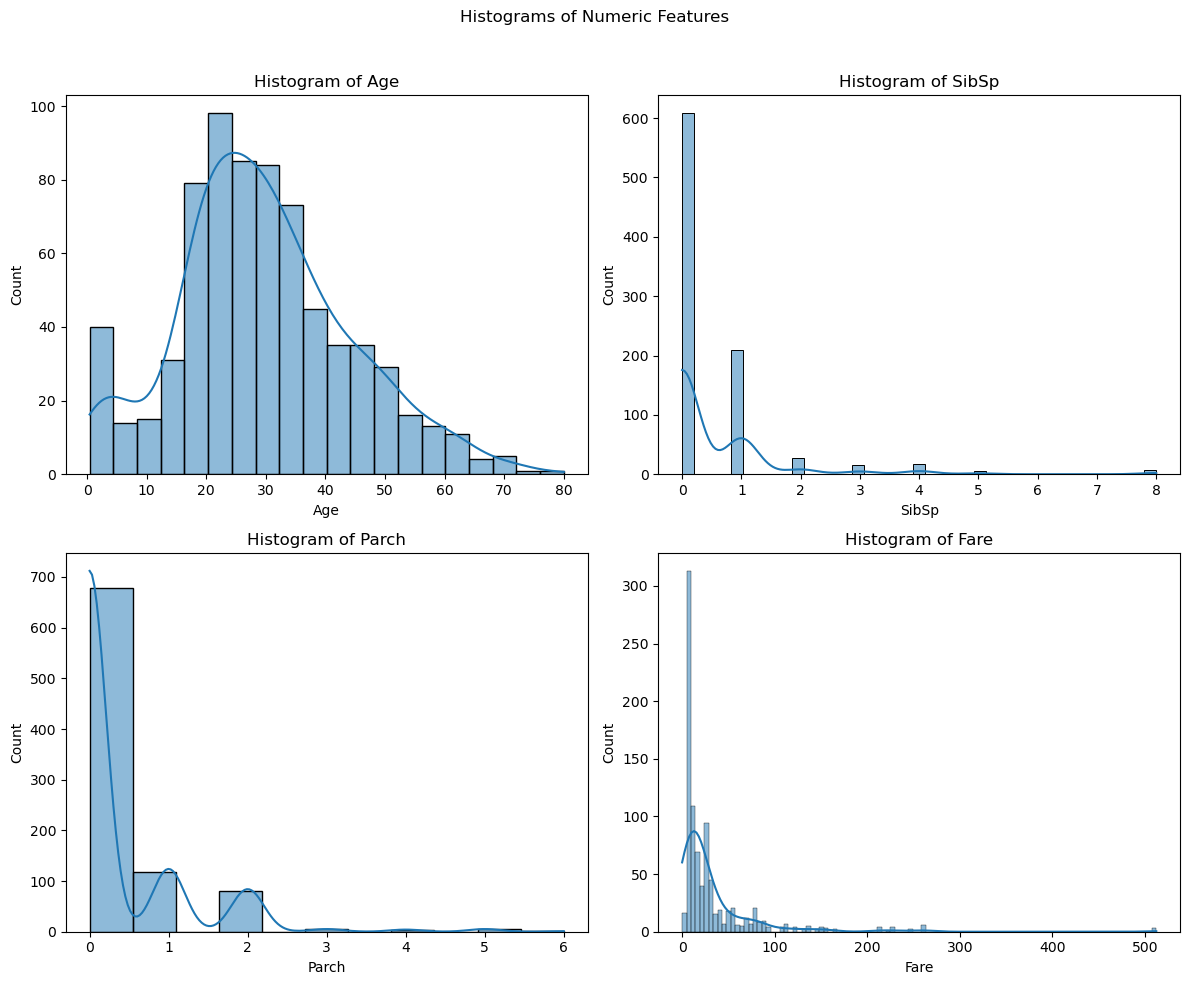

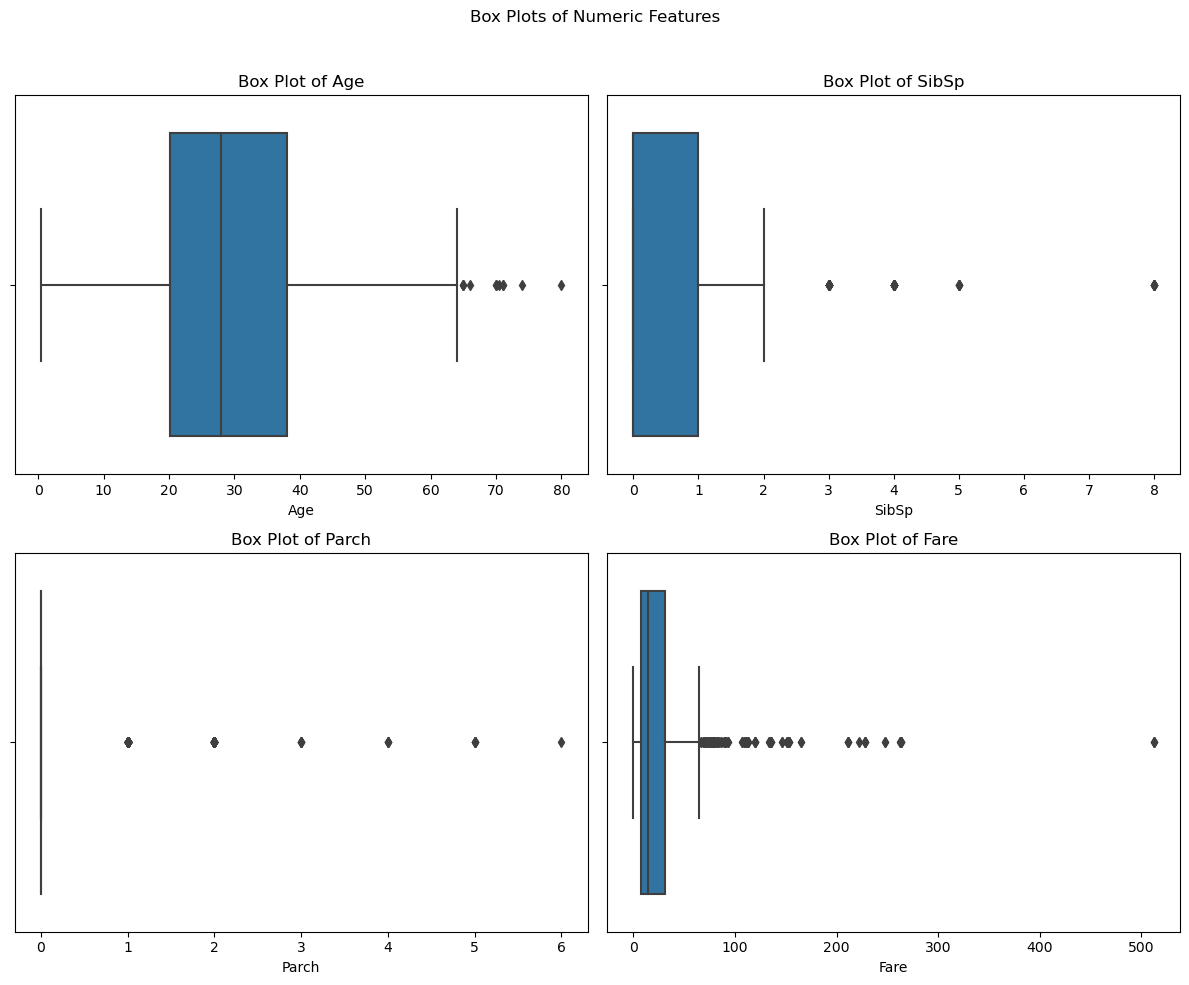

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numeric features
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Histograms of Numeric Features')

for i, feature in enumerate(numeric_features):
    sns.histplot(df[feature], kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Histogram of {feature}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Box plots for numeric features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Box Plots of Numeric Features')

for i, feature in enumerate(numeric_features):
    sns.boxplot(x=df[feature], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Box Plot of {feature}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


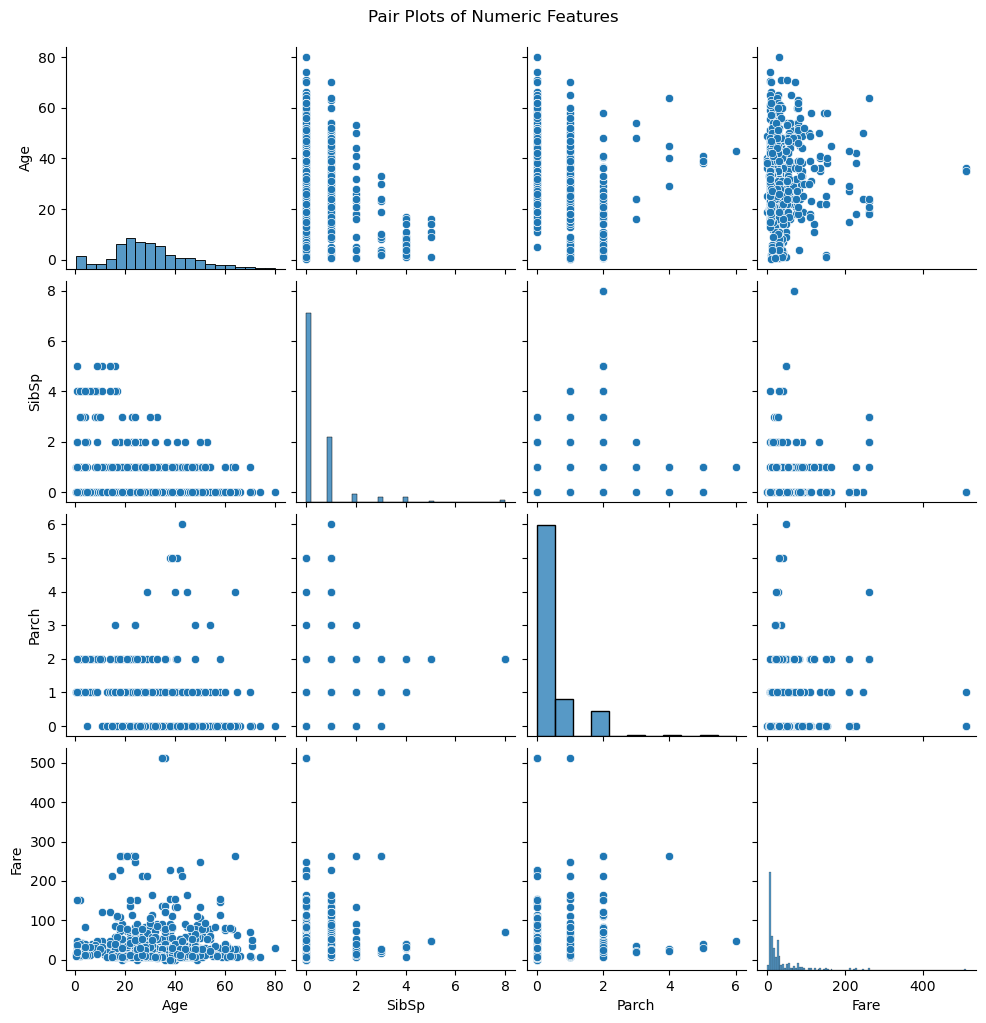

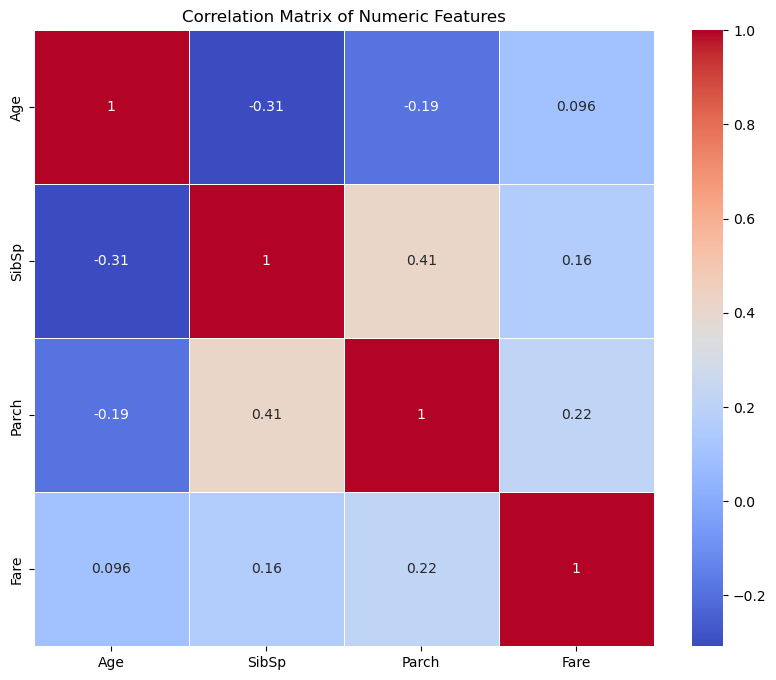

In [38]:
# Pair plot for numeric features
sns.pairplot(df[numeric_features])
plt.suptitle('Pair Plots of Numeric Features', y=1.02)
plt.show()

# Correlation matrix
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Handle missing values
# Fill missing values in 'Age' with the median
age_imputer = SimpleImputer(strategy='median')
df['Age'] = age_imputer.fit_transform(df[['Age']])

# Fill missing values in 'Embarked' with the most frequent value
embarked_imputer = SimpleImputer(strategy='most_frequent')
df['Embarked'] = embarked_imputer.fit_transform(df[['Embarked']])

# Drop the 'Cabin' column due to many missing values
df.drop(columns=['Cabin'], inplace=True)

# Encode categorical variables
categorical_features = ['Sex', 'Embarked']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Drop unnecessary columns
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Separate features and target variable
X = df.drop(columns=['Survived'])
y = df['Survived']

X.head(), y.head()


(   Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
 0       3  22.0      1      0   7.2500         1           0           1
 1       1  38.0      1      0  71.2833         0           0           0
 2       3  26.0      0      0   7.9250         0           0           1
 3       1  35.0      1      0  53.1000         0           0           1
 4       3  35.0      0      0   8.0500         1           0           1,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64)

Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F1-Score: 0.7639
ROC-AUC Score: 0.8825


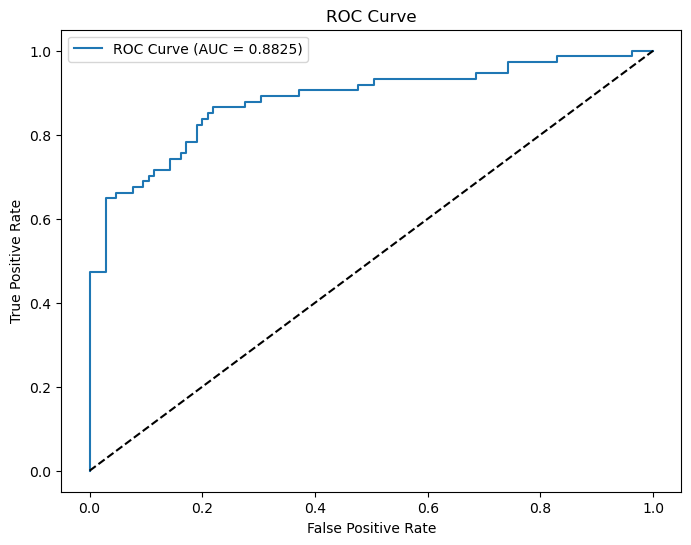

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [41]:
# Get the coefficients of the logistic regression model
coefficients = pd.DataFrame(log_reg.coef_[0], index=X.columns, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False)


,Coefficient
Fare,0.002576
Age,-0.030567
Parch,-0.107390
Embarked_Q,-0.115023
SibSp,-0.295632
Embarked_S,-0.400739
Pclass,-0.937753
Sex_male,-2.590615


In [52]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [53]:
import pickle

# Save the trained model
with open('log_reg_model.pkl', 'wb') as file:
    pickle.dump(log_reg, file)


In [55]:
import streamlit as st
import pandas as pd
import pickle

# Load the trained model
with open('log_reg_model.pkl', 'rb') as file:
    log_reg_model = pickle.load(file)

st.title('Titanic Survival Prediction')
st.write('Enter the passenger details to predict survival probability.')

# User inputs
pclass = st.selectbox('Pclass', [1, 2, 3])
sex = st.selectbox('Sex', ['male', 'female'])
age = st.slider('Age', 0, 100, 30)
sibsp = st.number_input('SibSp', 0, 10, 0)
parch = st.number_input('Parch', 0, 10, 0)
fare = st.number_input('Fare', 0.0, 1000.0, 50.0)
embarked = st.selectbox('Embarked', ['C', 'Q', 'S'])

# Prepare input data
input_data = pd.DataFrame({
    'Pclass': [pclass],
    'Age': [age],
    'SibSp': [sibsp],
    'Parch': [parch],
    'Fare': [fare],
    'Sex_male': [1 if sex == 'male' else 0],
    'Embarked_Q': [1 if embarked == 'Q' else 0],
    'Embarked_S': [1 if embarked == 'S' else 0]
})

# Predict survival probability
survival_proba = log_reg_model.predict_proba(input_data)[0, 1]
st.write(f'Survival Probability: {survival_proba:.2f}')


In [57]:
import numpy as np

# Get the coefficients of the logistic regression model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
})

# Exponentiate the coefficients to get the odds ratios
coefficients['Odds Ratio'] = np.exp(coefficients['Coefficient'])

# Display the coefficients and odds ratios
coefficients.sort_values(by='Odds Ratio', ascending=False)


,Feature,Coefficient,Odds Ratio
4,Fare,0.002576,1.002579
1,Age,-0.030567,0.969895
3,Parch,-0.107390,0.898175
6,Embarked_Q,-0.115023,0.891345
2,SibSp,-0.295632,0.744061
7,Embarked_S,-0.400739,0.669825
0,Pclass,-0.937753,0.391507
5,Sex_male,-2.590615,0.074974


In [58]:
##What is the difference between precision and recall?

#Precision: Measures the accuracy of positive predictions (TP / (TP + FP)).
#Recall: Measures the ability to identify all positive instances (TP / (TP + FN)).

##What is cross-validation, and why is it important in binary classification?

#Cross-validation: Assesses model performance by splitting data into training and testing sets multiple times.
#Importance: Reduces overfitting risk and provides a reliable estimate of model performance.